In [1]:
%pwd
%cd ..
%pwd

/home/dusan/Desktop/ML_PROJECTS/git/StableDiffusion


'/home/dusan/Desktop/ML_PROJECTS/git/StableDiffusion'

In [3]:
from models.ddpm import DDPMSampler

from PIL import Image
import torch
import numpy as np
import math

In [8]:
generator = torch.Generator()
generator.manual_seed(0)

ddpm_sampler = DDPMSampler(generator)

In [9]:
# How many noise levels to generate
noise_levels = [0, 10, 50, 75, 100, 250, 500, 750]

In [10]:
img = Image.open("./images/dog.png")
img_tensor = torch.tensor(np.array(img))
img_tensor = ((img_tensor / 255.0) * 2.0) - 1.0

In [11]:
# Generate images for each noise level
# Create a batch by repeating the same image many times
batch = img_tensor.repeat(len(noise_levels), 1, 1, 1)

In [12]:
ts = torch.tensor(noise_levels, dtype=torch.int, device=batch.device)

In [35]:
noise_imgs = []
epsilons = torch.randn(batch.shape, device=batch.device)
# Generate a noisifed version of the image for each noise level
for i in range(len(ts)):
    # a_hat = ddpm_sampler.alpha_cumulative_product[ts[i]]
    # noise_imgs.append(
    #     (math.sqrt(a_hat) * batch[i]) + (math.sqrt(1 - a_hat) * epsilons[i])
    # )
    noise_imgs.append(ddpm_sampler.add_noise(batch[i],ts[i]))
print(len(noise_imgs))

8


In [36]:
# noise_imgs = torch.stack(noise_imgs, dim=0)
noise_imgs = torch.stack(noise_imgs, dim=0)
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)

In [37]:
# Convert back to image and display
back_images = []
for i in range(len(noise_levels)):
    back_images.append(Image.fromarray(noise_imgs[i].squeeze(0).numpy(), 'RGB'))

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Num imgs in back images:8
<PIL.Image.Image image mode=RGB size=860x860 at 0x71A444441390>


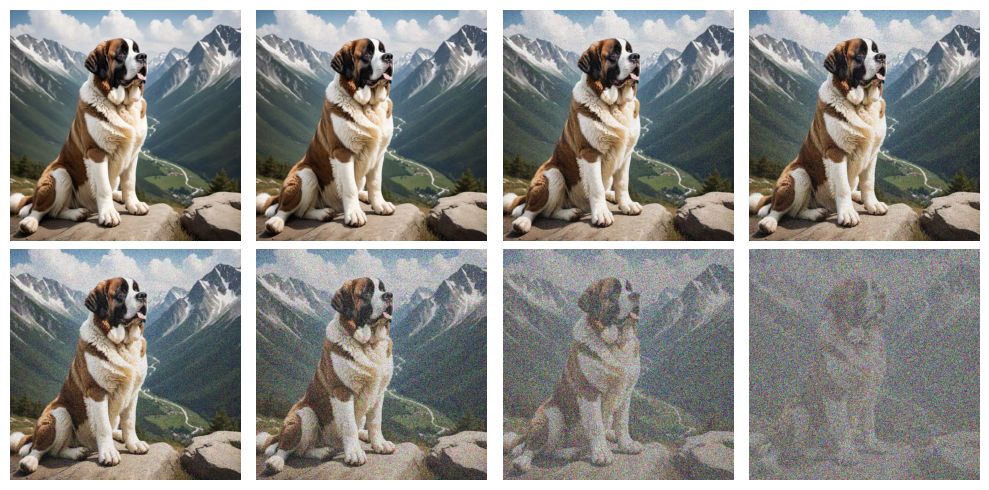

In [39]:
# Determine grid dimensions
num_images = len(back_images)
print(f"Num imgs in back images:{len(back_images)}")
print(back_images[0])
rows = 2
cols = num_images // rows

# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(10, 5))

# Display images
for i,img_b in enumerate(back_images):
    axs[i // cols, i % cols].imshow(img_b)
    axs[i // cols, i % cols].axis('off')  # Hide axes

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

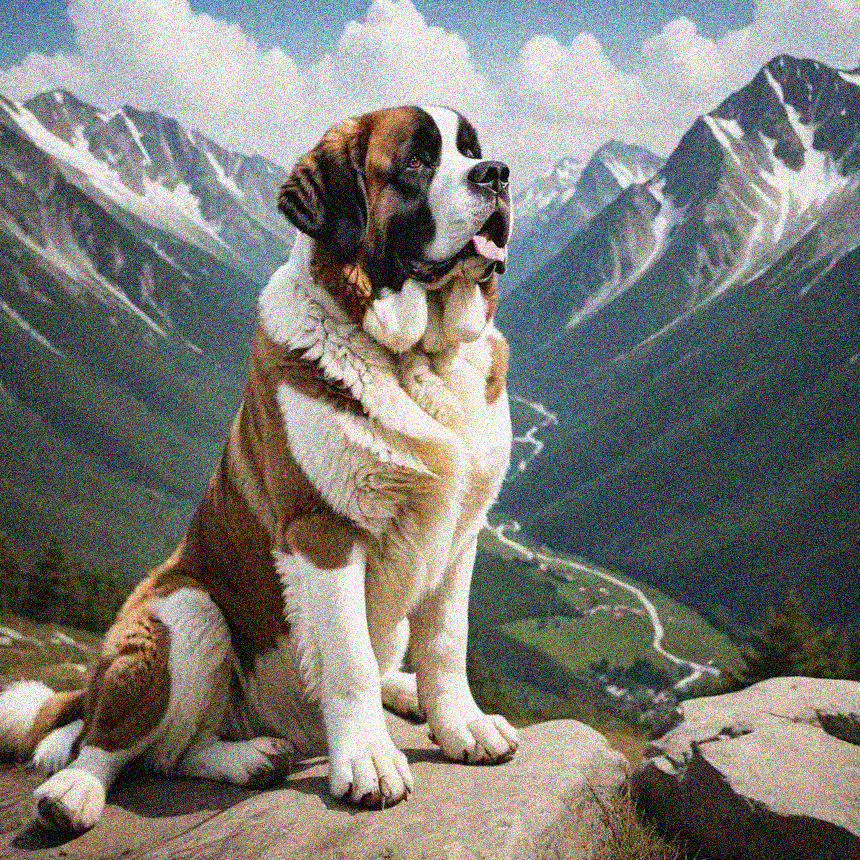

In [27]:
noise_imgs = torch.stack(noise_imgs, dim=0)
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)

# Convert back to image and display
display_img = Image.fromarray(noise_imgs[2].squeeze(0).numpy(), 'RGB')
display_img